In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [57]:
train_df= pd.read_csv('C:\\Users\\User\\Downloads\\train.csv')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [10]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [12]:
import seaborn as sns


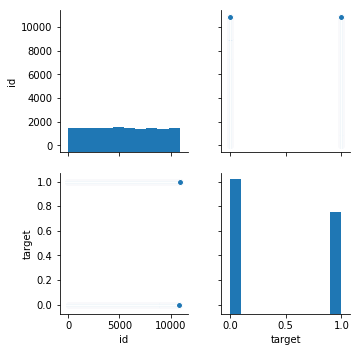

In [13]:
sns.pairplot(train_df)

In [15]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [16]:
train_df['location'].value_counts()

USA                  104
New York              71
United States         50
London                45
Canada                29
                    ... 
probably not home      1
italy                  1
Eastlake, OH           1
New York Brooklyn      1
Mexico City            1
Name: location, Length: 3341, dtype: int64

In [17]:
train_df['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
harm                     41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [58]:
train_df = train_df.drop('location', axis=1)

In [20]:
train_df

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,Police investigating after an e-bike collided ...,1


In [59]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [60]:
categorical_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent'))])

In [34]:
train_df.dtypes

id          int64
keyword    object
text       object
target      int64
dtype: object

In [61]:
cat= categorical_pipeline.fit_transform(train_df.select_dtypes(include='object'))

In [62]:
cat= pd.DataFrame(cat)

In [63]:
cat

,0,1
0,fatalities,Our Deeds are the Reason of this #earthquake M...
1,fatalities,Forest fire near La Ronge Sask. Canada
2,fatalities,All residents asked to 'shelter in place' are ...
3,fatalities,"13,000 people receive #wildfires evacuation or..."
4,fatalities,Just got sent this photo from Ruby #Alaska as ...
...,...,...
7608,fatalities,Two giant cranes holding a bridge collapse int...
7609,fatalities,@aria_ahrary @TheTawniest The out of control w...
7610,fatalities,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,fatalities,Police investigating after an e-bike collided ...


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


In [65]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('svc', LinearSVC())])


In [67]:
X= cat[1]
text_clf.fit(X,train_df['target'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [69]:
test_df= pd.read_csv('C:\\Users\\User\\Downloads\\test.csv')

In [70]:
test_df.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [73]:
test_df= test_df.drop('location',axis=1)

In [75]:
test_df

,id,keyword,text
0,0,NaN,Just happened a terrible car crash
1,2,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...
3258,10861,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [85]:
cat1= categorical_pipeline.fit_transform(test_df.select_dtypes(include='object'))
cat1= pd.DataFrame(cat1)

In [86]:
pred=text_clf.predict(cat1[1])

In [89]:
pred= pd.DataFrame(pred)

pred.value_counts()

0    1982
1    1281
dtype: int64

In [91]:
pred.to_csv('C:\\Users\\User\\Downloads\\output.csv')

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [93]:
RFM = Pipeline([('rfm',RandomForestClassifier())])
KNN = Pipeline([('KNN',KNeighborsClassifier())])

In [95]:
rfm_clf = Pipeline([('tfidf',TfidfVectorizer()),('rfm',RandomForestClassifier())])

In [97]:
rfm_clf.fit(X,train_df['target'])

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfm', RandomForestClassifier())])

In [98]:
pred_rfm = pd.DataFrame(rfm_clf.predict(cat1[1]))


In [100]:
pred_rfm.to_csv('C:\\Users\\User\\Downloads\\RFMoutput.csv')

In [101]:
knn_clf = Pipeline([('tfidf',TfidfVectorizer()),('KNN',KNeighborsClassifier())])
knn_clf.fit(X,train_df['target'])
pred_knn = pd.DataFrame(knn_clf.predict(cat1[1]))
pred_knn.to_csv('C:\\Users\\User\\Downloads\\knnoutput.csv')